In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

### Explore the data

In [21]:
data = pd.read_csv("clean_data.csv") #import dataset

In [22]:
#list all the column headers:
for i in data.columns:
    print(i)

hotel_name
address
country
average_Score_hotel
total_number_of_reviews
reviewer_score
All_Review
positive_review
negative_review
review_date
reviewer_nationality
total_number_of_reviews_reviewer_has_given
tags
lat
lng


In [23]:
len(data) #total number of reviews

515212

In [24]:
len(data.hotel_name.unique()) #total number of hotels being reviewed in this dataset

1492

In [25]:
max_rating = data.average_Score_hotel.max()
max_rating

9.8

In [26]:
min_rating = data.average_Score_hotel.min() 
min_rating

5.2

In [27]:
mean_rating = data.average_Score_hotel.mean()
print('The mean rating is '+ str(mean_rating))


The mean rating is 8.397766938658263


##### [ The ratings are between 5.2 and 9.8, with a mean of 8.4 ]

### Natural Language Processing - Tokenize the reviews and build a bag-of-words model
The first goal is to do sentiment analysis on the positive and negative reviews. To do this, we need to first tokenize the words using nltk, remove the stopwords, and build a bag-of-words model.

In [28]:
#nltk.download("punkt")

In [29]:
pos_reviews = data.positive_review
neg_reviews = data.negative_review
print(type(pos_reviews))

<class 'pandas.core.series.Series'>


In [30]:
pos_reviews_words = nltk.word_tokenize(pos_reviews[1]) #word_tokenize only works for text file, not whole series
#len(pos_reviews[0])
#print(pos_reviews[1])
print(pos_reviews_words) #tokenize and print the second review (the first was too short)

['No', 'real', 'complaints', 'the', 'hotel', 'was', 'great', 'great', 'location', 'surroundings', 'rooms', 'amenities', 'and', 'service', 'Two', 'recommendations', 'however', 'firstly', 'the', 'staff', 'upon', 'check', 'in', 'are', 'very', 'confusing', 'regarding', 'deposit', 'payments', 'and', 'the', 'staff', 'offer', 'you', 'upon', 'checkout', 'to', 'refund', 'your', 'original', 'payment', 'and', 'you', 'can', 'make', 'a', 'new', 'one', 'Bit', 'confusing', 'Secondly', 'the', 'on', 'site', 'restaurant', 'is', 'a', 'bit', 'lacking', 'very', 'well', 'thought', 'out', 'and', 'excellent', 'quality', 'food', 'for', 'anyone', 'of', 'a', 'vegetarian', 'or', 'vegan', 'background', 'but', 'even', 'a', 'wrap', 'or', 'toasted', 'sandwich', 'option', 'would', 'be', 'great', 'Aside', 'from', 'those', 'minor', 'minor', 'things', 'fantastic', 'spot', 'and', 'will', 'be', 'back', 'when', 'i', 'return', 'to', 'Amsterdam']


In [31]:
len(pos_reviews)

515212

In [32]:
pos_reviews_wordslist = []  
#for i in range(5):
for i in range(515212):
    pos_reviews_wordslist.append(nltk.word_tokenize(pos_reviews.iloc[i])) #tokenize text in each positive review

In [33]:
total_words_pos = 0
#Loop through the list of lists and count the words in each sublist
for sublist in pos_reviews_wordslist:
    total_words_pos+=len(sublist)

# Print the total number of words
print("Total number of words in the list:", total_words_pos)

Total number of words in the list: 8485464


In [34]:
print(pos_reviews_wordslist[:5])

[['Only', 'the', 'park', 'outside', 'of', 'the', 'hotel', 'was', 'beautiful'], ['No', 'real', 'complaints', 'the', 'hotel', 'was', 'great', 'great', 'location', 'surroundings', 'rooms', 'amenities', 'and', 'service', 'Two', 'recommendations', 'however', 'firstly', 'the', 'staff', 'upon', 'check', 'in', 'are', 'very', 'confusing', 'regarding', 'deposit', 'payments', 'and', 'the', 'staff', 'offer', 'you', 'upon', 'checkout', 'to', 'refund', 'your', 'original', 'payment', 'and', 'you', 'can', 'make', 'a', 'new', 'one', 'Bit', 'confusing', 'Secondly', 'the', 'on', 'site', 'restaurant', 'is', 'a', 'bit', 'lacking', 'very', 'well', 'thought', 'out', 'and', 'excellent', 'quality', 'food', 'for', 'anyone', 'of', 'a', 'vegetarian', 'or', 'vegan', 'background', 'but', 'even', 'a', 'wrap', 'or', 'toasted', 'sandwich', 'option', 'would', 'be', 'great', 'Aside', 'from', 'those', 'minor', 'minor', 'things', 'fantastic', 'spot', 'and', 'will', 'be', 'back', 'when', 'i', 'return', 'to', 'Amsterdam'], 

In [35]:
type(pos_reviews_wordslist)

list

In [36]:
neg_reviews_wordslist = [] #repeat tokenization for negative reviews
for i in range(515212):
    neg_reviews_wordslist.append(nltk.word_tokenize(neg_reviews.iloc[i])) #tokenize text in each negative review

In [37]:
total_words_neg = 0
#Loop through the list of lists and count the words in each sublist
for sublist in neg_reviews_wordslist:
    total_words_neg+=len(sublist)

# Print the total number of words
print("Total number of words in the list:", total_words_neg)

Total number of words in the list: 9198202


In [38]:
print(neg_reviews_wordslist[-5:])

[['no', 'trolly', 'or', 'staff', 'to', 'help', 'you', 'take', 'the', 'luggage', 'to', 'the', 'room'], ['The', 'hotel', 'looks', 'like', '3', 'but', 'surely', 'not', '4'], ['The', 'ac', 'was', 'useless', 'It', 'was', 'a', 'hot', 'week', 'in', 'vienna', 'and', 'it', 'only', 'gave', 'more', 'hot', 'air'], ['No', 'Negative'], ['I', 'was', 'in', '3rd', 'floor', 'It', 'didn', 't', 'work', 'Free', 'Wife']]


#### We have tokenized all the positive and negative reviews. Now we can apply stopwords and build a bag-of-words model with the filtered words.

In [39]:
#nltk.download("stopwords")

In [40]:
#len(nltk.corpus.stopwords.words("english")) #all the reviews in this dataset are in English

In [41]:
nltk.corpus.stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [42]:
useless_words = nltk.corpus.stopwords.words("english")
type(useless_words)
#useless_words

list

In [43]:
#useless_words

In [44]:
def build_bag_of_words_filtered(words):
    return {
        word:1 for word in words 
        if not word in useless_words}

This function takes a list of words as input and returns a dictionary where each word in the input list is a key in the dictionary, and the corresponding value is set to 1, but only if the word is not found in the collection called useless_words

We can build the negative and positive features separately using the build-bag-of-words function
The format of the positive features should be:

    [
        ( { "here":1, "some":1, "words":1 }, "pos" ),
        ( { "another":1, "tweet":1}, "pos" )
    ]
    
It is a list of tuples, the first element is a dictionary of the words with 1 if that word appears, the second the "pos" or "neg" string.

In [45]:
positive_features = None
positive_features = [(build_bag_of_words_filtered(review),'pos') for review in pos_reviews_wordslist ]

In [46]:
positive_features[-1]

({'staff': 1, 'kind': 1}, 'pos')

In [47]:
type(positive_features)

list

In [48]:
negative_features = None
negative_features = [(build_bag_of_words_filtered(review),'neg') for review in neg_reviews_wordslist ]

In [49]:
negative_features[-2:]

[({'No': 1, 'Negative': 1}, 'neg'),
 ({'I': 1, '3rd': 1, 'floor': 1, 'It': 1, 'work': 1, 'Free': 1, 'Wife': 1},
  'neg')]

### Train a Classifier for Sentiment Analysis

We are using Naive Bayes classifier. Training it on 80 percent of the data, and test on the remaining 20 percent.

In [50]:
from nltk.classify import NaiveBayesClassifier

In [51]:
#Using 80% of the data for training, the rest for validation:
split = int(len(positive_features) * 0.8)
split

412169

In [52]:
classifier = NaiveBayesClassifier.train(positive_features[:split]+negative_features[:split])

In [53]:
#check the accuracy on the training and test sets, turning accuracy into percentage:

In [54]:
training_accuracy = None #check accuracy of training set
training_accuracy = nltk.classify.util.accuracy(classifier, positive_features[:split] + negative_features[:split])*100
training_accuracy

93.48980636583536

The training accuracy is around 93.5 percent, which is quite good.

In [55]:
test_accuracy = None #check accuracy of test set
test_accuracy = nltk.classify.util.accuracy(classifier, positive_features[split:] + negative_features[split:])*100
test_accuracy

92.54728608445018

#### The test accuracy is over 92.5 percent, which is really good and almost as high as the training accuracy. It is also significantly higher for the estimated human prediction accuracy of 80%. 



#### This shows the Naive Bayes Classifier is a good method to use for this analysis since it performs well for this type of dataset. 



We can now print the most informative features below to understand why. The most informative features are the words that mostly identify a positive or a negative review, or the words that had the greatest effect on the prediction accuracy.

In [56]:
classifier.show_most_informative_features()

Most Informative Features
                Negative = 1                 neg : pos    =  22585.2 : 1.0
                Positive = 1                 pos : neg    =  11589.0 : 1.0
                   Comfy = 1                 pos : neg    =    234.4 : 1.0
             Outstanding = 1                 pos : neg    =    211.7 : 1.0
                Friendly = 1                 pos : neg    =    208.2 : 1.0
                Spacious = 1                 pos : neg    =    184.5 : 1.0
               Brilliant = 1                 pos : neg    =    168.8 : 1.0
                 History = 1                 pos : neg    =    154.3 : 1.0
                Charming = 1                 pos : neg    =    153.0 : 1.0
             Beautifully = 1                 pos : neg    =    133.4 : 1.0


As we can see, the words "negative" and "positive" appeared in lots of reviews and are quite informative. But due to the nature of the dataset (worded like a questionaire), lots of reviews actually say "no positive" or "no negative" which can be tricky since they would represent the opposite sentiment, which is why the ratio is not 100 percent (number of reviews versus 1). 

Since 9 out of 10 most informative features indicate high accuracy for a positive prediction, I decided to look at more of these features:

In [57]:
classifier.show_most_informative_features(50)

Most Informative Features
                Negative = 1                 neg : pos    =  22585.2 : 1.0
                Positive = 1                 pos : neg    =  11589.0 : 1.0
                   Comfy = 1                 pos : neg    =    234.4 : 1.0
             Outstanding = 1                 pos : neg    =    211.7 : 1.0
                Friendly = 1                 pos : neg    =    208.2 : 1.0
                Spacious = 1                 pos : neg    =    184.5 : 1.0
               Brilliant = 1                 pos : neg    =    168.8 : 1.0
                 History = 1                 pos : neg    =    154.3 : 1.0
                Charming = 1                 pos : neg    =    153.0 : 1.0
             Beautifully = 1                 pos : neg    =    133.4 : 1.0
              Convenient = 1                 pos : neg    =    132.1 : 1.0
                 Helpful = 1                 pos : neg    =    125.2 : 1.0
               Excellent = 1                 pos : neg    =    121.8 : 1.0

#### From this list of most informative features, it's interesting to note that quite a few of the informative words from positive reviews refer to the hotel *staff* (Friendly, Helpful, Efficient) and *location* (Convenient, Conveniently, Convenience), while the most informative words for negative reviews seem to refer mostly to the *facilities* (Thin, Charged, Unusable, Lack, unreliable, damaged, Loud, Noisy, Smelly, Missing, loudly)

### Relationship between number of reviews a reviewer has given & review score

We also want to explore whether there is a relationship between the number of reviews a reviewer has given in this dataset and the review score they give to a particular hotel (a larger number of reviews indicates the reviewer is an experienced traveller and often stays at this type of hotels). One hypothesis is a more experienced traveller might have higher standards and give a lower rating.

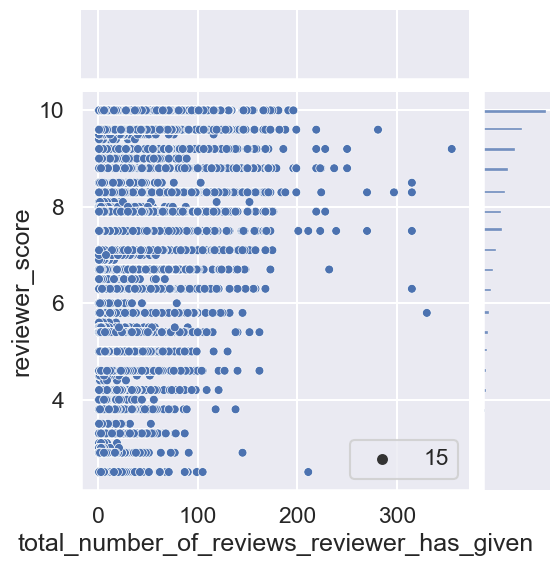

In [75]:
sns_plot=sns.jointplot(x="total_number_of_reviews_reviewer_has_given", y="reviewer_score", data = data, size=15) 

In [76]:
max(data.total_number_of_reviews_reviewer_has_given.unique())

355